# TEXT Mining


In [1]:
#loading the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
import nltk

In [2]:
tweet_data = pd.read_csv('Elon_musk.csv',encoding='ISO-8859-1')
tweet_data.drop('Unnamed: 0',axis=1,inplace=True)
tweet_data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Text preprocessing

In [3]:
#removing the leading and trailing characters
tweet_data = [text.strip() for text in tweet_data.Text]
#removing the empty strings
tweet_data = [text for text in tweet_data if text]

In [4]:
tweet_data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [5]:
#joing all the texts
texts = ' '.join(tweet_data)
#exts

In [6]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles=True)
tokens=tokenizer.tokenize(texts)
tokens = str(tokens)
#print(tokens)

In [7]:
#removing punctuations
for c in string.punctuation:
    tokens= tokens.replace(c,"")
    
#tokens

In [8]:
# removing links from the text
import re
wo_links=re.sub(r'http\S+', '', tokens)
wo_links=wo_links.lower()
#wo_links

In [9]:
wo_n = re.sub("[0-9" "]+"," ",wo_links).lower() #removing numbers
wo_s = re.sub("[^A-Za-z" "]+"," ",wo_n).lower() #removing special characters
#wo_s

In [10]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91775\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91775\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
ft = word_tokenize(wo_s)
#print(ft)

In [12]:
#removing stopwords
without_sw = [word for word in ft if word not in stopwords.words('english')]
#print(without_sw)

In [13]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
lem=nlp(' '.join(without_sw))
#print(lem)

In [14]:
simple_words=[token.lemma_ for token in lem]
simple_words

['x',
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'try',
 'great',
 'interview',
 'doge',
 'underestimate',
 'congratulation',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'thought',
 'would',
 'fail',
 'haha',
 'thank',
 'indeed',
 'tweet',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'entertain',
 'outcome',
 'likely',
 'send',
 'agree',
 'clubhouse',
 'x',
 'get',
 'real',
 'buy',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'definitely',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'please',
 'unlock',
 'account',
 'u',
 'f',
 'u',
 'f',
 'true',
 'power',
 'haha',
 'crypto',
 'wallet',
 'x',
 'give',
 'private',
 'key',
 'avoid',
 'cost',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavy',
 'launch',
 'first',
 'two',
 'element',
 'lunar',
 'gateway',
 'together',
 'one',
 'mission',
 'yes',
 'predic

In [15]:
#converting into vectors using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
tf = CountVectorizer()
vectors = tf.fit_transform(simple_words)

In [16]:
#print(tf.vocabulary_)

In [17]:
#now using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer()
vectors1 = td.fit_transform(simple_words)

In [18]:
feature_names = tf.get_feature_names()
dense = vectors1.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)
df

,ab,aber,able,abo,aboard,abort,absence,absolute,absolutely,absorb,...,yolt,york,young,yup,zealand,zenit,zero,zip,zon,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
w_list = ' '.join(df)

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black',
                      width=2000,
                      height=1600).generate(w_list)

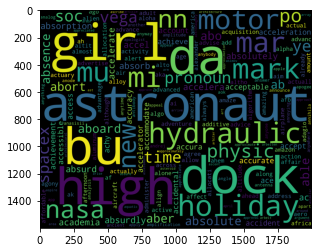

In [21]:
plt.imshow(wordcloud);

In [22]:
for i in lem[0:10]:
    print(i, i.pos_)

x PUNCT
alien PROPN
ray NOUN
tracing VERB
cyberpunk NOUN
hdr PROPN
nextlevel NOUN
tried VERB
great ADJ
interview NOUN


In [23]:
#Filtering for nouns and verbs 
nouns_verbs = [token.text for token in lem if token.pos_ in ('NOUN', 'VERB')]
#print(nouns_verbs)

In [24]:
#Counting tokens again
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0).tolist()[0]
words_freq = [(word, sum_words[idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,tesla,61
1,launch,47
2,haha,43
3,make,33
4,people,32
5,dragon,31
6,starship,31
7,year,30
8,spacex,30
9,production,30


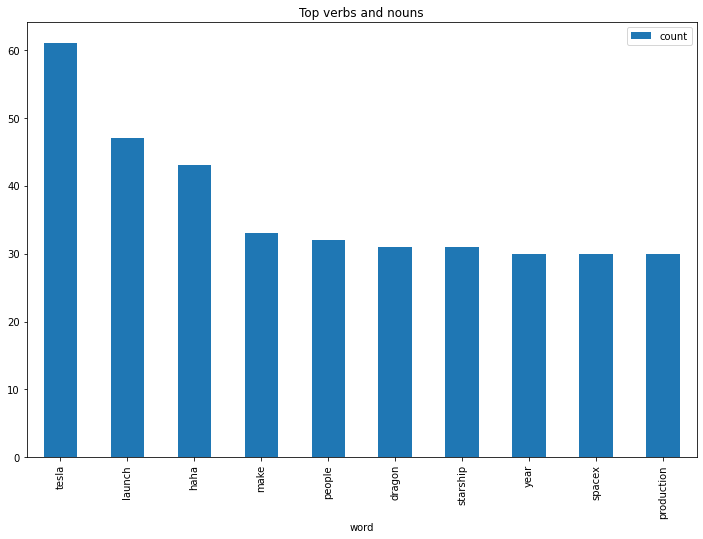

In [25]:
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns');

# Sentiment Analysis

In [26]:
import pandas as pd
from textblob import TextBlob
import re

In [27]:
def get_cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)#removes username
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)# removes hyperlink
    text=  re.sub("[^A-Za-z" "]+"," ",text) #removes special characters
    return text

In [37]:
tweet_data = pd.DataFrame(tweet_data,columns=['text'])

In [38]:
tweet_data

,text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [39]:
tweet_data['clean_text'] = tweet_data['text'].apply(get_cleanText)

In [40]:
tweet_data['clean_text']

0                                            I m an alien
1        AA Carmack Ray tracing on Cyberpunk with HDR ...
2                                        Great interview 
3                                  Doge is underestimated
4        Congratulations Tesla China for amazing execu...
                              ...                        
1994     True it sounds so surreal but the negative pr...
1995     Make sure to read ur terms amp conditions bef...
1996                                       Samwise Gamgee
1997                    Altho Dumb and Dumber is U F U F 
1998                              Progress update August 
Name: clean_text, Length: 1999, dtype: object

In [41]:
#function to get subjectivity
def get_Subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [42]:
#function to get polarity(positive or negative)
def get_Polarity(text):
    return TextBlob(text).sentiment.polarity

In [43]:
tweet_data['Subjectivity'] = tweet_data['clean_text'].apply(get_Subjectivity)
tweet_data['Polarity'] = tweet_data['clean_text'].apply(get_Polarity)

In [44]:
tweet_data

,text,clean_text,Subjectivity,Polarity
0,@kunalb11 Im an alien,I m an alien,0.750000,-0.250000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,AA Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,@joerogan @Spotify Great interview!,Great interview,0.750000,0.800000
3,@gtera27 Doge is underestimated,Doge is underestimated,0.000000,0.000000
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,0.366667,0.275000
...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",True it sounds so surreal but the negative pr...,0.508333,0.111111
1995,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms amp conditions bef...,0.888889,0.500000
1996,@TeslaGong @PPathole Samwise Gamgee,Samwise Gamgee,0.000000,0.000000
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is U F U F,0.500000,-0.375000


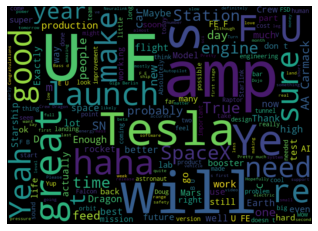

In [45]:
#plotting the tweet
allwords = ' '.join([word for word in tweet_data['clean_text']])
wc = WordCloud(width=700,height=500,random_state=4,max_font_size=150).generate(allwords)

plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show();

In [46]:
#function to compute whether a tweet is positive or negative
def get_score(score):
    score = float(score)
    if (score < 0):
        return 'Negative'
    elif (score == 0):
        return 'Neutral'
    elif score > 0:
        return 'Positive'
    

In [47]:
tweet_data['Sentiment']= tweet_data['Polarity'].apply(get_score)
tweet_data

,text,clean_text,Subjectivity,Polarity,Sentiment
0,@kunalb11 Im an alien,I m an alien,0.750000,-0.250000,Negative
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,AA Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,@joerogan @Spotify Great interview!,Great interview,0.750000,0.800000,Positive
3,@gtera27 Doge is underestimated,Doge is underestimated,0.000000,0.000000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,0.366667,0.275000,Positive
...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",True it sounds so surreal but the negative pr...,0.508333,0.111111,Positive
1995,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms amp conditions bef...,0.888889,0.500000,Positive
1996,@TeslaGong @PPathole Samwise Gamgee,Samwise Gamgee,0.000000,0.000000,Neutral
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is U F U F,0.500000,-0.375000,Negative


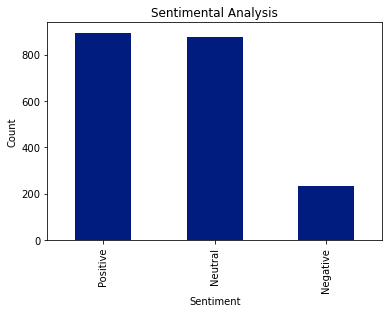

In [48]:
plt.title("Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.style.use('seaborn-dark-palette')
tweet_data['Sentiment'].value_counts().plot(kind='bar');

In [50]:
#all positive tweets
positive=tweet_data[tweet_data['Polarity']>0]
positive['text']

2                     @joerogan @Spotify Great interview!
4       @teslacn Congratulations Tesla China for amazi...
5       Happy New Year of the Ox! https://t.co/9WFKMYu2oj
7          @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8       @flcnhvy @anonyx10 Indeed! Tweets definitely d...
                              ...                        
1986                   Best use of the term Full Stack?
1987    @PPathole @IheartTesla For sure. This is both ...
1991    @IheartTesla No easy way to answer this in a t...
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
Name: text, Length: 894, dtype: object

In [51]:
#all negative tweets
negatives=tweet_data[tweet_data['Polarity']<0]
negatives['text']

0                                  @kunalb11 Im an alien
21                          @freewalletorg Your app sucks
25      @RationalEtienne @Adamklotz_ Starlink is a sta...
26      @RationalEtienne @Adamklotz_ SpaceX needs to p...
32      @SRuhle Everyone at Tesla receives stock. \n\n...
                              ...                        
1943    @teslaownersSV @engineers_feed The strength &a...
1949    @katlinegrey Reusability is essential. A rocke...
1958    @jgrano305 @TeslaratiTeam @Teslarati We have r...
1989        @buzzindelhi Sorry, should hopefully be soon!
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
Name: text, Length: 231, dtype: object

In [52]:
#getting the percentage of positive tweets
ptweets = positive['text']
score = round(ptweets.shape[0]/tweet_data.shape[0] *100)
print("The percentage of positive tweets is {} %.".format(score))

The percentage of positive tweets is 45 %.


In [53]:
ntweets = negatives['text']
scoren = round(ntweets.shape[0]/tweet_data.shape[0] *100)
print("The percentage of negative tweets is {} %.".format(scoren))

The percentage of negative tweets is 12 %.


In [54]:
neutral = tweet_data[tweet_data['Polarity']==0]
neutral = neutral['text']
nn = round(neutral.shape[0]/tweet_data.shape[0] *100)
print("The percentage of Neutral tweets is {} %.".format(nn))

The percentage of Neutral tweets is 44 %.
